# Model improvement and selection


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


# Generalizability of our models

We want to train models on known data in order to make inferences (predictions) on unknown data -> **supervised ML**

How do we know how good our models are? 

# Metrics for regression

MSE: Mean Squared Error

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - h(x_i))^2$$

MAE: Mean Absolute Error 

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - h(x_i)|$$

MAPE: Mean Absolute Percent Error

$$MAE = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - h(x_i)|}{y_i}$$

Explained Variance:


$$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$



https://scikit-learn.org/stable/datasets/toy_dataset.html

In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import numpy as np


nn = MLPRegressor()

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)
nn.fit(X_train, y_train)

y_hat = nn.predict(X_test)

mean_absolute_error(y_test, y_hat), np.sqrt(mean_squared_error(y_test, y_hat))

/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(145.97020219031825, 166.41485718360843)

# Metrics in classification

A first approximation could be the % of examples that we got right. This is called _accuracy_.

In [5]:
breast = datasets.load_breast_cancer()
breast_X, breast_y = breast['data'], breast['target']

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(breast_X, breast_y)
lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)
probs = lr.predict_proba(X_test)

/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

precision_score(y_test, y_hat), recall_score(y_test, y_hat), roc_auc_score(y_test, y_hat), f1_score(y_test, y_hat)

What if we had very few positive examples?

## The Confusion Matrix

![A confusion matrix](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

from https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781838555078/6/ch06lvl1sec34/confusion-matrix

## Precision and recall

![Precision and recall](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

Probably best to understand them as conditional probabilities:

Precision: What is the probability that an example is actually positive, given I've predicted it to be positive?

Recall: What is the probability of me calling an example positive, given it is actually positive?

from https://en.wikipedia.org/wiki/Precision_and_recall

## F1 measure

A good default choice because it combines both precission and recall:

$$ F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$


### $F_\beta$

F beta is a generalization of F1 that uses a (positive) weighting $\beta$ so that recall is considered $\beta$ times more important than precision.

## Precision-recall and ROC curves

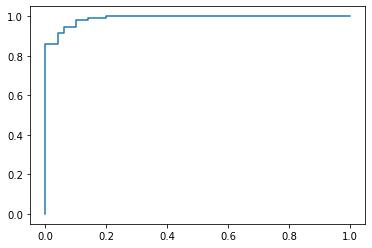

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])

plt.plot(fpr, tpr)

## Targeting metrics other than accuracy

[The scoring parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

# The bias-variance tradeoff


Bias: systematic error: your model doesn't quite capture the shape of the underlying function, but this doesn't change with different subsets of the input data.

Variance: Your model changes a lot depending on the input data

![Bias and variance](figs/bias-variance.png)

from http://scott.fortmann-roe.com/docs/BiasVariance.html

How can we decompose these two terms in practice?


![Model complexity and generalizability](https://i.stack.imgur.com/GEJIM.png)

from http://scott.fortmann-roe.com/docs/BiasVariance.html

What we want is generally to go into the overfitting zone to make sure we are not leaving performance on the table and then tune back our model with some regularization technique.

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# tambn podemos tocar los hyperparametrosrf = RandomForestClassifier(min_samples_leaf=5)

rf.fit(X_train, y_train)

roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]), roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])

(0.9711827956989247, 1.0)

## Train-validation-test split

![Train-validation-test split](https://upload.wikimedia.org/wikipedia/commons/b/bb/ML_dataset_training_validation_test_sets.png)


from https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets

## K-fold cross validation

![5-fold cross validation](https://www.mltut.com/wp-content/uploads/2020/05/cross-validation.png)

from https://www.mltut.com/k-fold-cross-validation-in-machine-learning-how-does-k-fold-work/

# K-fold Cross validation in sklearn


In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(X=X_train, y=y_train, estimator=rf)

array([0.98837209, 0.96470588, 0.98823529, 0.91764706, 0.96470588])

Pros

* Estimation of variance of our model
* Better use of data

Cons

* Computational cost

## Visualizing the result of a cross-validation

### Overfitting

![Under- and overfitting](https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png)

from https://djsaunde.wordpress.com/2017/07/17/the-bias-variance-tradeoff/

## `sklearn` Pipelines for fun and profit

For:

1. Convenience

2. Joint parameter selection

In [20]:
#without Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(breast_X, breast_y)

scaler = StandardScaler()
classifier = RandomForestClassifier()

scaled = scaler.fit_transform(X_train)
classifier.fit(scaled, y_train)

test_scaled = scaler.transform(X_test)
y_hat = classifier.predict(test_scaled)

In [23]:
#with Pipelines
X_train, X_test, y_train, y_test = train_test_split(breast_X, breast_y)

scaler = StandardScaler()
classifier = RandomForestClassifier()

pipeline = Pipeline(steps = [('step_1',scaler),
                             ('step_2',classifier)])

pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)

### And now the magic

https://scikit-learn.org/stable/modules/model_evaluation.html

In [27]:
from sklearn.model_selection import GridSearchCV, ParameterGrid

grid = {'step_2__n_estimators': [10, 25, 100], 
        'step_2__min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(pipeline, param_grid=grid)

grid_search.fit(X_train, y_train)



GridSearchCV(estimator=Pipeline(steps=[('step_1', StandardScaler()),
                                       ('step_2', RandomForestClassifier())]),
             param_grid={'step_2__min_samples_leaf': [1, 5, 10],
                         'step_2__n_estimators': [10, 25, 100]})

# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

[Regression metrics in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

[A Simple Guide to Scikit-learn Pipelines](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

[scikit-learn for developers](https://scikit-learn.org/stable/developers/develop.html)

[Creating your own estimator in scikit-learn](http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/)